In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import numpy as np
import geopandas
import matplotlib.colors as colors
import os
import glob

%matplotlib inline

In [2]:
print('Get current working directory : ', os.getcwd())

Get current working directory :  C:\Users\Jennifer Angel-Amaya\Documents\Projects\Grand_challenge_Amazonas\Gold_samples\LIBS_compiled\geochem_pro_spectra


In [3]:
pwd

'C:\\Users\\Jennifer Angel-Amaya\\Documents\\Projects\\Grand_challenge_Amazonas\\Gold_samples\\LIBS_compiled\\geochem_pro_spectra'

In [4]:
#READ ABEL GEOCHEM DATA

# Specify the directory containing the CSV files
csv_dir = r'C:\Users\Jennifer Angel-Amaya\Documents/Projects/Grand_challenge_Amazonas/Gold_samples/LIBS_compiled/geochem_pro_spectra/Abel_gold_Test_509ed'

# Initialize an empty list to store dataframes for each CSV file
df_list = []

# Loop through all CSV files in the directory
for file_name in os.listdir(csv_dir):
    if file_name.endswith('.csv'):
        # Construct the file path
        file_path = os.path.join(csv_dir, file_name)
        # Read the CSV file into a dataframe and append to the list
        df = pd.read_csv(file_path)
        # Drop the first row of the dataframe
        df = df.iloc[1:]
        df_list.append(df)

# Concatenate all dataframes into a single dataframe and set the column names to the file names
abel_geochem_df = pd.concat(df_list, axis=1, keys=[file_name[:-4] for file_name in os.listdir(csv_dir) if file_name.endswith('.csv')])

abel_geochem_df = abel_geochem_df.apply(pd.to_numeric, errors='ignore', downcast='float')


# Display the resulting dataframe
print(abel_geochem_df.head())
# abel_geochem_df

      Shot(1)              Shot(10)             Shot(100)            \
   wavelength intensity  wavelength intensity  wavelength intensity   
1  180.100006       0.0  180.100006       0.0  180.100006       0.0   
2  180.199997       0.0  180.199997       0.0  180.199997       0.0   
3  180.300003       0.0  180.300003       0.0  180.300003       0.0   
4  180.399994       0.0  180.399994       0.0  180.399994       0.0   
5  180.500000       0.0  180.500000       0.0  180.500000       0.0   

    Shot(101)             Shot(102)            ...    Shot(95)            \
   wavelength intensity  wavelength intensity  ...  wavelength intensity   
1  180.100006       0.0  180.100006       0.0  ...  180.100006       0.0   
2  180.199997       0.0  180.199997       0.0  ...  180.199997       0.0   
3  180.300003       0.0  180.300003       0.0  ...  180.300003       0.0   
4  180.399994       0.0  180.399994       0.0  ...  180.399994       0.0   
5  180.500000       0.0  180.500000       0.0 

In [12]:
##CORRECT the first column Shot(1) does not include the intensity values

mask = abel_geochem_df.loc[:, (slice(None), 'wavelength')] == 479.3
abel_au_peak = abel_geochem_df.loc[mask.any(axis=1), :]
#abel_au_peak = abel_au_peak.drop(columns=abel_au_peak.columns[1])
#abel_au_peak.set_index(abel_au_peak.iloc[:, 0], inplace=True)
abel_au_peak.head()


Shot(1)                  Shot(10)                Shot(100)  \
      wavelength     intensity  wavelength    intensity  wavelength   
2993  479.299988  14949.237543  479.299988  2087.580078  479.299988   

                     Shot(101)                Shot(102)                ...  \
         intensity  wavelength    intensity  wavelength     intensity  ...   
2993  12745.014169  479.299988  8768.605017  479.299988  10950.734466  ...   

        Shot(95)                 Shot(96)                  Shot(97)  \
      wavelength    intensity  wavelength     intensity  wavelength   
2993  479.299988  9343.061681  479.299988  13042.181174  479.299988   

                      Shot(98)                  Shot(99)                
         intensity  wavelength     intensity  wavelength     intensity  
2993  14678.932535  479.299988  12973.862462  479.299988  13837.387931  

[1 rows x 508 columns]

In [14]:
abel_geochem_df_loc=abel_geochem_df.loc[:, (slice(None), 'intensity')]
abel_geochem_df_loc = abel_geochem_df_loc.drop(columns=abel_geochem_df_loc.columns[1])
#abel_geochem_df_loc.set_index(abel_geochem_df_loc.iloc[:, 0], inplace=True)

abel_geochem_df_loc

,Shot(1),Shot(100),Shot(101),Shot(102),Shot(103),Shot(104),Shot(105),Shot(106),Shot(107),Shot(108),...,Shot(90),Shot(91),Shot(92),Shot(93),Shot(94),Shot(95),Shot(96),Shot(97),Shot(98),Shot(99)
,intensity,intensity,intensity,intensity,intensity,intensity,intensity,intensity,intensity,intensity,...,intensity,intensity,intensity,intensity,intensity,intensity,intensity,intensity,intensity,intensity
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

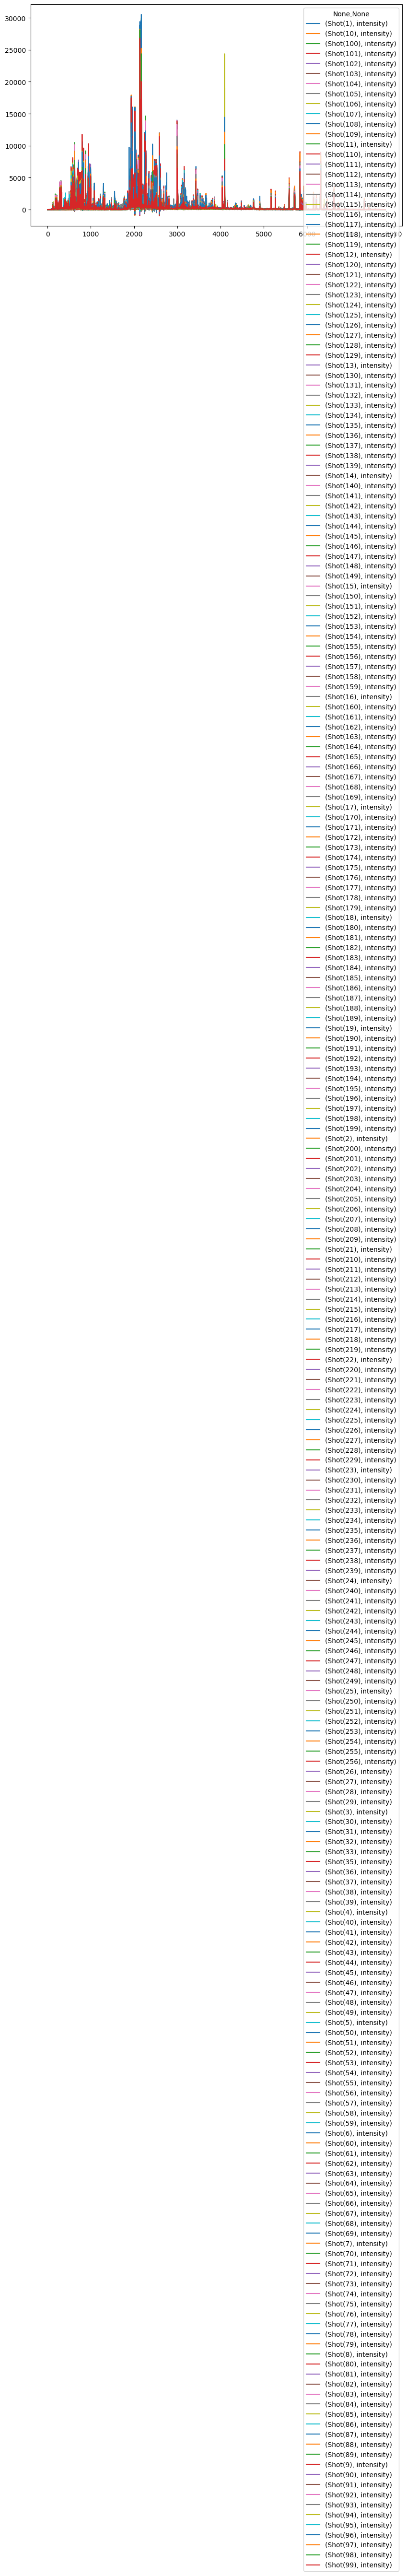

In [15]:
# divide the "intensity" columns of the dataframes

ratio_df = abel_geochem_df.loc[:, (slice(None), 'intensity')].divide(abel_au_peak.loc[:, (slice(None), 'intensity')], fill_value=1.0,axis=1,level=2)


ratio_df.head()
ratio_df.plot(figsize=(10,6))


In [16]:
csv_files = glob.glob(csv_dir + "/*.csv") #gives the list of files
# csv_files
#print(abel_geochem_df.dtypes)
#abel_geochem_df.columns

<AxesSubplot: title={'center': 'Abel'}, xlabel='wavelength'>

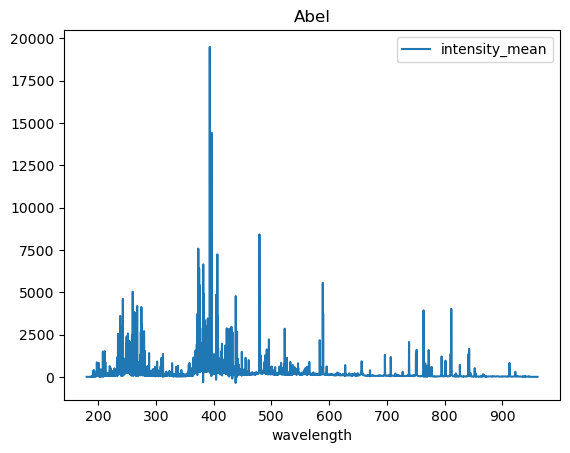

In [19]:
Abel_geochem_ave = abel_geochem_df.groupby(level=1, axis=1).mean()
Abel_geochem_ave.index = Abel_geochem_ave.iloc[:, 1]
Abel_geochem_ave = Abel_geochem_ave.drop(columns=Abel_geochem_ave.columns[1])
Abel_geochem_ave.columns = ['intensity_mean']
Abel_geochem_ave.plot(title='Abel')
